In [1]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics, cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load the data
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
y = pd.to_numeric(df['class'])
df = df.drop('class', axis=1)

df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [3]:
# Purity
def purity_score(y, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

# K-means
kmeans = []
for i in range(3):
    kmeans += [KMeans(n_clusters=3, random_state=i)]
    kmeans[i].fit(df_norm)
    y_pred = kmeans[i].labels_
    print("Silhouette score for k-means with random_state =", i, ":", metrics.silhouette_score(df_norm, y_pred, metric='euclidean'))
    print("Purity score for k-means with random_state =", i, ":", purity_score(y, y_pred))

# The non-determinism is caused by the random initialization of the centroids. The centroids are initialized randomly, and the algorithm will converge to a local minimum. The algorithm will converge to a different local minimum depending on the random initialization of the centroids.

Silhouette score for k-means with random_state = 0 : 0.11362027575179431
Purity score for k-means with random_state = 0 : 0.7671957671957672
Silhouette score for k-means with random_state = 1 : 0.11403554201377074
Purity score for k-means with random_state = 1 : 0.7632275132275133
Silhouette score for k-means with random_state = 2 : 0.11362027575179431
Purity score for k-means with random_state = 2 : 0.7671957671957672


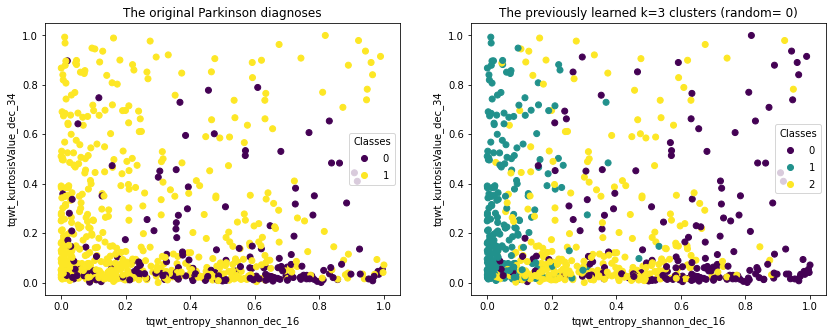

In [4]:
sorted_by_variance = df_norm.var().sort_values(ascending=False)
features = sorted_by_variance[:2].index

plt.figure(figsize=(14, 5))
plt.subplot(121)
scatter = plt.scatter(df_norm[features[0]], df_norm[features[1]], c = y)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(*scatter.legend_elements(), loc="best", title="Classes")
plt.title('The original Parkinson diagnoses')

plt.subplot(122)
scatter = plt.scatter(df_norm[features[0]], df_norm[features[1]], c=kmeans[0].labels_)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(*scatter.legend_elements(), loc="best", title="Classes")
plt.title('The previously learned k=3 clusters (random= 0)')


plt.show()

In [5]:
#PCA
pca = PCA(n_components=0.8)
pca.fit(df_norm)

print(pca.n_components_, "principal components are needed to explain more than 80% of variability.")

31 principal components are needed to explain more than 80% of variability.
